Must needed setup before every assignment

In [27]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

openjdk-8-jdk-headless is already the newest version (8u242-b08-0ubuntu3~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


Imports

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

Code Variables

In [0]:
k = 20
lamb = 0.1
iters = 40
eta = 0.015

trainfile = "ratings.train.txt"
myfile = open(trainfile, 'r')

q = {}
p = {}

Code

In [30]:
# first traverse, initialize all q and p
for line in myfile:
    items = line.strip().split("\t")
    q_row = int(items[0])
    p_row = int(items[1])
    if q_row in q:
        pass
    else:
        q[q_row] = np.random.rand(k) * np.sqrt(5.0/float(k))
    if p_row in p:
        pass
    else:
        p[p_row] = np.random.rand(k) * np.sqrt(5.0/float(k))


# start to train the data
error_record = []
for ii in xrange(iters):
    # in each iter, open file again
    readfile = open(trainfile, 'r')
    for readline in readfile:
        ratings = readline.strip().split("\t")
        q_idx = int(ratings[0])
        p_idx = int(ratings[1])
        rate = int(ratings[2])

        qi = q[q_idx]
        pu = p[p_idx]
        pu_T = pu.reshape(k, 1)
        varep = 2.0 * (rate - np.dot(qi, pu_T))
        # update
        qi_new = qi + eta * (varep * pu - 2.0 * lamb * qi)
        pu_new = pu + eta * (varep * qi - 2.0 * lamb * pu)
        q[q_idx] = qi_new
        p[p_idx] = pu_new
    # calculate error
    error = 0.0
    readfile = open(trainfile, 'r')
    for readline in readfile:
        ratings = readline.strip().split("\t")
        q_idx = int(ratings[0])
        p_idx = int(ratings[1])
        rate = int(ratings[2])

        qi = q[q_idx]
        pu = p[p_idx]
        pu_T = pu.reshape(k, 1)
        error += (rate - np.dot(qi, pu_T)) ** 2
    for q_key in q:
        error += np.sum(q[q_key] * q[q_key])
    for p_key in p:
        error += np.sum(p[p_key] * p[p_key])
    # record error in each iter
    error_scalar = error.reshape(())
    print str(ii + 1) + " of " + str(iters) + " iters: " + str(error_scalar)
    error_record.append(error_scalar)


1 of 40 iters: 92988.3394603329
2 of 40 iters: 91318.54092140027
3 of 40 iters: 89844.56301592861
4 of 40 iters: 87686.98999727593
5 of 40 iters: 85285.57644489984
6 of 40 iters: 83068.07559074678
7 of 40 iters: 80967.84949209825
8 of 40 iters: 78931.8304488497
9 of 40 iters: 77008.11826945811
10 of 40 iters: 75253.9817283649
11 of 40 iters: 73691.24572267436
12 of 40 iters: 72314.0920056719
13 of 40 iters: 71105.69489963732
14 of 40 iters: 70047.0750696334
15 of 40 iters: 69120.14335535315
16 of 40 iters: 68308.47486592463
17 of 40 iters: 67597.40006109654
18 of 40 iters: 66973.91441555158
19 of 40 iters: 66426.54579281008
20 of 40 iters: 65945.21668698036
21 of 40 iters: 65521.11076716084
22 of 40 iters: 65146.54579120682
23 of 40 iters: 64814.85326599352
24 of 40 iters: 64520.26504335238
25 of 40 iters: 64257.80717077612
26 of 40 iters: 64023.20143816595
27 of 40 iters: 63812.775077535145
28 of 40 iters: 63623.378961518814
29 of 40 iters: 63452.3144367663
30 of 40 iters: 63297.26867

Plot result and save file

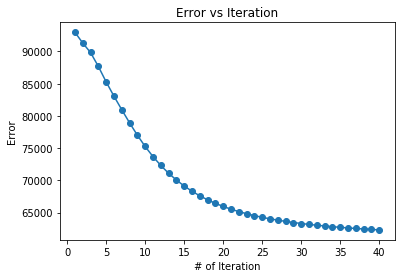

In [31]:
x = np.arange(0, iters, 1) + 1
y = error_record
plt.plot(x, y, "-o")
plt.xlabel("# of Iteration")
plt.ylabel("Error")
plt.title("Error vs Iteration")
plt.savefig('plot03.png', dpi=300, bbox_inches='tight')
plt.show()